In [1]:
#learn gung fu
import numpy as np
import pandas as pd
pd.options.display.max_columns = 61
pd.options.display.max_rows = 61
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import mason_functions as mf
import explore
import wrangle
import scale 

from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Wrangle

In [2]:
#set a list of categorical columns based on the columns above
categorical = ['attrition',
               'business_travel',
               'department',
               'education_field',
               'gender',
               'job_role',
               'marital_status',
               'overtime'
              ]

#set a list of discrete columns
discrete = ['education',
            'environment_satisfaction',
            'job_involvement',
            'job_level',
            'job_satisfaction',
            'performance_rating',
            'relationship_satisfaction', 
            'stock_option_level',
            'work_life_balance'
           ]

#set a list of numeric columns
numeric = ['age',
           'daily_rate',
           'distance_from_home',
           'education',
           'environment_satisfaction',
           'hourly_rate',
           'job_involvement',
           'job_level',
           'job_role',
           'job_satisfaction',
           'monthly_income',
           'monthly_rate',
           'companies_worked',
           'percent_salary_hike',
           'performance_rating',
           'relationship_satisfaction',
           'stock_option_level',
           'total_working_years',
           'hours_trained_last_year',
           'work_life_balance',
           'company_years',
           'current_role_years',
           'years_since_last_promotion',
           'years_with_manager'
          ]

In [3]:
#pull in datasets
df, train, validate, test = wrangle.prepare_attrition()

# Model

In [4]:
#preview unsplit data
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [5]:
#juxtapose subset shapes
train.shape, validate.shape, test.shape

((823, 56), (353, 56), (294, 56))

In [6]:
#preview train set
train.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,hours_trained_last_year,work_life_balance,company_years,current_role_years,years_since_last_promotion,years_with_manager,travel_none,travel_frequently,travel_rarely,hr_dept,research_dev_dept,sales_dept,hr_ed,life_sciences_ed,marketing_ed,medical_ed,other_ed,tech_deg_ed,female,healthcare_rep_job,hr_job,lab_tech_job,manager_job,manufacturing_dir_job,research_dir_job,research_scientist_job,sales_exec_job,sales_rep_job,divorced,married,single
employee_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
791,52,0,Non-Travel,715,Research & Development,19,4,Medical,4,Male,41,3,1,Research Scientist,4,Married,4258,26589,0,0,18,3,1,1,5,3,3,4,3,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
505,55,0,Travel_Rarely,1311,Research & Development,2,3,Life Sciences,3,Female,97,3,4,Manager,4,Single,16659,23258,2,1,13,3,3,0,30,2,3,5,4,1,2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
900,37,0,Travel_Frequently,1231,Sales,21,2,Medical,3,Female,54,3,1,Sales Representative,4,Married,2973,21222,5,0,15,3,2,1,10,3,3,5,4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1684,23,1,Travel_Rarely,1320,Research & Development,8,1,Medical,4,Male,93,2,1,Laboratory Technician,3,Single,3989,20586,1,1,11,3,1,0,5,2,3,5,4,1,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
712,48,0,Travel_Rarely,817,Sales,2,1,Marketing,2,Male,56,4,2,Sales Executive,2,Married,8120,18597,3,0,12,3,4,0,12,3,3,2,2,2,2,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Moving forward
* I will try models with all of the features and I will try models with just the most important variables discovered in EDA
* I will move forward with features that have a relationship to the target variable in mind
    * job satisfaction
    * relationship satisfaction
    * total working years
    * distance from home
    * job level
    * monthly income
    * stock option level
    * technical degree education
    * sales rep job
    * lab tech job
    * marital status
        * being single
        * being divorced
    * overtime
    * age

Let's set a baseline and start with a decision tree model.

Most employees stay, and the mode is a good baseline. Let's stick with that.

In [7]:
#set baseline equal to mode
baseline_prediction = 0

#copy train df
other_train = train.copy()

#add column representing baseline prediction
other_train['baseline_prediction'] = 0

#calculate baseline accuracy
baseline_accuracy = (other_train.baseline_prediction == other_train.attrition).mean()
print(f'Baseline accuracy is {round(baseline_accuracy * 100)}%')

Baseline accuracy is 84%


In [8]:
#set up modeling data
X_train = train.drop(columns = categorical)
y_train = train.attrition

X_validate = validate.drop(columns = categorical)
y_validate = validate.attrition

X_test = test.drop(columns = categorical)
y_test = test.attrition

In [9]:
#create the object
dtm = DecisionTreeClassifier(max_depth = 10, random_state = 421)

#fit the object
dtm.fit(X_train, y_train)

#use the object
y_pred = dtm.predict(X_train)

In [10]:
#print accuracy on training set
print(f'Accuracy of Decision Tree classifier on training set: {round(dtm.score(X_train, y_train) * 100)}%')

Accuracy of Decision Tree classifier on training set: 98%


In [11]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       690
           1       0.98      0.90      0.94       133

    accuracy                           0.98       823
   macro avg       0.98      0.95      0.96       823
weighted avg       0.98      0.98      0.98       823



Seems pretty good. Let's try this on the validate set. I don't want to overfit the model. 10 leaves is kinda asking for it.

In [12]:
#print accuracy on validate set
print(f'Accuracy of Decision Tree classifier on validate set: {round(dtm.score(X_validate, y_validate) * 100)}%')

Accuracy of Decision Tree classifier on validate set: 76%


This model is definitely overfit. Let's evaluate different in-sample and out-of-sample accuracies to see what kind of max depth we should have for this model.

In [13]:

def tree_train_validate(X_train, y_train, X_validate, y_validate, tree_model, min_samples_leaf):

    depth_range = range(1, 11)    # set a range of depths to explore

    scores = []    # set an empty list for validate scores

    metrics = []    # set an empty list for dictionaries

    for depth in depth_range:    # commence loop through different max depths for Decision Tree

        model = tree_model(max_depth = depth, min_samples_leaf = min_samples_leaf, random_state = 421) # create object

        model.fit(X_train, y_train)    # fit object

        scores.append(model.score(X_validate, y_validate))    # add validate scores to scores list

        in_sample_accuracy = model.score(X_train, y_train)    # calculate accuracy on train set

        out_of_sample_accuracy = model.score(X_validate, y_validate)    # calculate accuracy on validate set

        output = {                                       # create dictionary with max_depth,
            'max_depth': depth,                          # train set accuracy, and validate accuracy
            'train_accuracy': in_sample_accuracy,        
            'validate_accuracy': out_of_sample_accuracy
        }

        metrics.append(output)    # add dictionaries to list

    plt.figure()    # create figure

    plt.xlabel('depth')    # label x-axis

    plt.ylabel('accuracy')    # label y-axis

    plt.scatter(depth_range, scores, color = 'indianred') # plot relatiosnhip between depth range and validate accuracy

    plt.xticks([0, 2, 4, 6, 8, 10])    # customize x-axis label ticks

    plt.title('Validate Accuracy')    # title

    plt.show();

    metrics_df = pd.DataFrame(metrics)    # form dataframe from scores data

    metrics_df = metrics_df.set_index('max_depth')

    metrics_df['difference'] = metrics_df.train_accuracy - metrics_df.validate_accuracy   # create column of values
                                                                        # for difference between train and validate
    print(metrics_df)         # view metrics dataframe

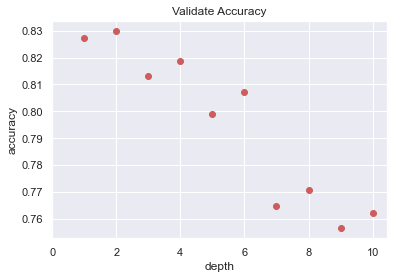

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.840826,0.827195,0.013631
1,2,0.856622,0.830028,0.026594
2,3,0.865128,0.813031,0.052096
3,4,0.872418,0.818697,0.053721
4,5,0.899149,0.798867,0.100283
5,6,0.907655,0.807365,0.100289
6,7,0.921021,0.764873,0.156148
7,8,0.938032,0.770538,0.167493
8,9,0.948967,0.756374,0.192593
9,10,0.958688,0.762040,0.196648


In [14]:
depth_range = range(1, 11)    # set a range of depths to explore

scores = []    # set an empty list for validate scores

metrics = []    # set an empty list for dictionaries

for depth in depth_range:    # commence loop through different max depths for Decision Tree
    
    dtm = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = 3, random_state = 421) # create object
    
    dtm.fit(X_train, y_train)    # fit object
    
    scores.append(dtm.score(X_validate, y_validate))    # add validate scores to scores list
    
    in_sample_accuracy = dtm.score(X_train, y_train)    # calculate accuracy on train set
    
    out_of_sample_accuracy = dtm.score(X_validate, y_validate)    # calculate accuracy on validate set
    
    output = {                                       # create dictionary with max_depth,
        'max_depth': depth,                          # train set accuracy, and validate accuracy
        'train_accuracy': in_sample_accuracy,        
        'validate_accuracy': out_of_sample_accuracy
    }
    
    metrics.append(output)    # add dictionaries to list

plt.figure()    # create figure

plt.xlabel('depth')    # label x-axis

plt.ylabel('accuracy')    # label y-axis

plt.scatter(depth_range, scores, color = 'indianred') # plot relatiosnhip between depth range and validate accuracy

plt.xticks([0, 2, 4, 6, 8, 10])    # customize x-axis label ticks

plt.title('Validate Accuracy')    # title

plt.show();

metrics_df = pd.DataFrame(metrics)    # form dataframe from scores data

metrics_df['difference'] = metrics_df.train_accuracy - metrics_df.validate_accuracy   # create column of values
                                                                    # for difference between train and validate
metrics_df          # view metrics dataframe

Looks like max depth of 2 is the way to go for this training set. Let's try a different training set.

In [15]:
second_train = ['job_satisfaction',
                'relationship_satisfaction',
                'total_working_years',
                'distance_from_home',
                'job_level',
                'monthly_income',
                'stock_option_level',
                'tech_deg_ed',
                'sales_rep_job',
                'lab_tech_job',
                'single',
                'divorced',
                'overtime',
                'age'
               ]

In [16]:
X2_train = train[second_train]
y2_train = train.attrition    # this is the same as y_train

X2_validate = validate[second_train]
y2_validate = validate.attrition    # this is the same as y_validate

X2_test = test[second_train]
y2_test = test.attrition    # this is the same as y_test

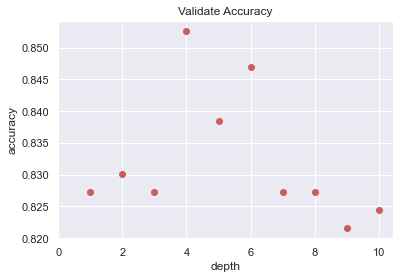

           train_accuracy  validate_accuracy  difference
max_depth                                               
1                0.840826           0.827195    0.013631
2                0.856622           0.830028    0.026594
3                0.861482           0.827195    0.034287
4                0.873633           0.852691    0.020942
5                0.879708           0.838527    0.041181
6                0.894289           0.847025    0.047264
7                0.913730           0.827195    0.086535
8                0.924666           0.827195    0.097470
9                0.934386           0.821530    0.112857
10               0.938032           0.824363    0.113669


In [17]:
tree_train_validate(X2_train, y2_train, X2_validate, y2_validate, DecisionTreeClassifier, 3)

Max depth 4 is the way to go with this train. Still, barely beating baseline with the validate set.

In [18]:
#creation
dtm = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3, random_state = 421)

#fitting
dtm.fit(X2_train, y2_train)

#predicting
y_pred = dtm.predict(X2_validate)

print(classification_report(y2_validate, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       296
           1       0.62      0.23      0.33        57

    accuracy                           0.85       353
   macro avg       0.74      0.60      0.63       353
weighted avg       0.83      0.85      0.82       353



Let's try some random forests models.

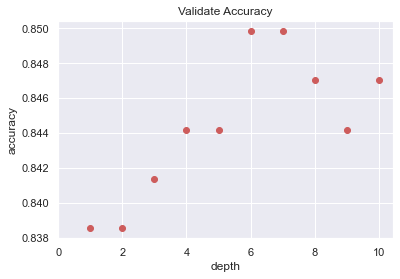

           train_accuracy  validate_accuracy  difference
max_depth                                               
1                0.838396           0.838527   -0.000131
2                0.838396           0.838527   -0.000131
3                0.850547           0.841360    0.009187
4                0.860267           0.844193    0.016075
5                0.867558           0.844193    0.023365
6                0.876063           0.849858    0.026205
7                0.882139           0.849858    0.032280
8                0.891859           0.847025    0.044834
9                0.894289           0.844193    0.050097
10               0.899149           0.847025    0.052124


In [19]:
tree_train_validate(X_train, y_train, X_validate, y_validate, RandomForestClassifier, 3)

In-sample accuracy improves with depth, but out of sample accuracy doesn't break 85%. Baseline accuracy is already 84%.

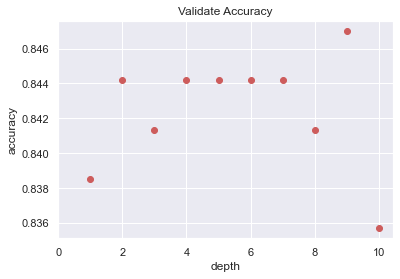

           train_accuracy  validate_accuracy  difference
max_depth                                               
1                0.838396           0.838527   -0.000131
2                0.846902           0.844193    0.002709
3                0.856622           0.841360    0.015262
4                0.862697           0.844193    0.018505
5                0.877278           0.844193    0.033086
6                0.880923           0.844193    0.036731
7                0.888214           0.844193    0.044021
8                0.893074           0.841360    0.051714
9                0.900365           0.847025    0.053339
10               0.900365           0.835694    0.064670


In [20]:
tree_train_validate(X2_train, y2_train, X2_validate, y2_validate, RandomForestClassifier, 3)

The pattern above continues. Let's try K-Nearest Neighbor

In [21]:
def KNN_metrics(X_train, y_train, X_validate, y_validate, weights):
    k_range = range(1, 21)
    scores = []
    metrics = []
    for k in k_range:
        titan_knn = KNeighborsClassifier(n_neighbors = k, weights = weights)
        titan_knn.fit(X_train, y_train)

        scores.append(titan_knn.score(X_validate, y_validate))

        in_sample_accuracy = titan_knn.score(X_train, y_train)
        out_of_sample_accuracy = titan_knn.score(X_validate, y_validate)
        output = {
            'n_neighbors': k,
            'train_accuracy': in_sample_accuracy,
            'validate_accuracy': out_of_sample_accuracy
        }

        metrics.append(output)

    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, scores)
    plt.xticks([0, 5, 10, 15, 20])
    plt.title('Validate Accuracy')
    plt.show();
    metrics_df = pd.DataFrame(metrics)
    metrics_df = metrics_df.set_index('n_neighbors')
    metrics_df['difference'] = metrics_df.train_accuracy - metrics_df.validate_accuracy
    print(metrics_df)

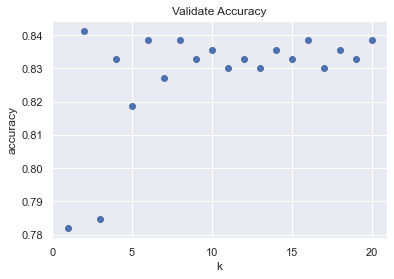

             train_accuracy  validate_accuracy  difference
n_neighbors                                               
1                  1.000000           0.781870    0.218130
2                  0.879708           0.841360    0.038349
3                  0.884569           0.784703    0.099866
4                  0.860267           0.832861    0.027406
5                  0.854192           0.818697    0.035495
6                  0.851762           0.838527    0.013235
7                  0.848117           0.827195    0.020921
8                  0.849332           0.838527    0.010805
9                  0.849332           0.832861    0.016471
10                 0.844471           0.835694    0.008777
11                 0.844471           0.830028    0.014443
12                 0.846902           0.832861    0.014040
13                 0.844471           0.830028    0.014443
14                 0.844471           0.835694    0.008777
15                 0.844471           0.832861    0.0116

In [22]:
KNN_metrics(X_train, y_train, X_validate, y_validate, 'uniform')

Having 2 neighbors is ideal here. Barely matches baseline.

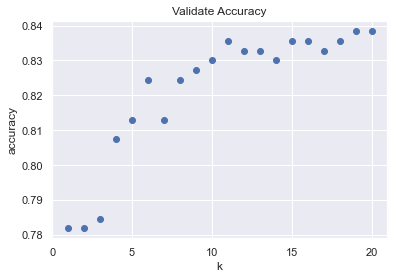

             train_accuracy  validate_accuracy  difference
n_neighbors                                               
1                       1.0           0.781870    0.218130
2                       1.0           0.781870    0.218130
3                       1.0           0.784703    0.215297
4                       1.0           0.807365    0.192635
5                       1.0           0.813031    0.186969
6                       1.0           0.824363    0.175637
7                       1.0           0.813031    0.186969
8                       1.0           0.824363    0.175637
9                       1.0           0.827195    0.172805
10                      1.0           0.830028    0.169972
11                      1.0           0.835694    0.164306
12                      1.0           0.832861    0.167139
13                      1.0           0.832861    0.167139
14                      1.0           0.830028    0.169972
15                      1.0           0.835694    0.1643

In [23]:
KNN_metrics(X_train, y_train, X_validate, y_validate, 'distance')

None of these validate sets beat the baseline.

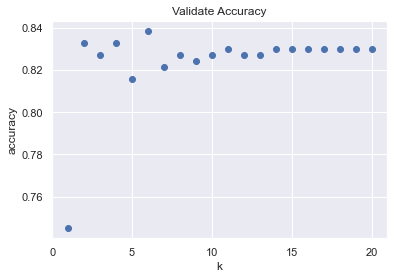

             train_accuracy  validate_accuracy  difference
n_neighbors                                               
1                  1.000000           0.745042    0.254958
2                  0.859052           0.832861    0.026191
3                  0.871203           0.827195    0.044007
4                  0.850547           0.832861    0.017686
5                  0.845687           0.815864    0.029822
6                  0.839611           0.838527    0.001084
7                  0.842041           0.821530    0.020512
8                  0.842041           0.827195    0.014846
9                  0.843256           0.824363    0.018894
10                 0.842041           0.827195    0.014846
11                 0.842041           0.830028    0.012013
12                 0.840826           0.827195    0.013631
13                 0.843256           0.827195    0.016061
14                 0.842041           0.830028    0.012013
15                 0.840826           0.830028    0.0107

In [24]:
KNN_metrics(X2_train, y2_train, X2_validate, y2_validate, 'uniform')

Nothing here beats the baseline.

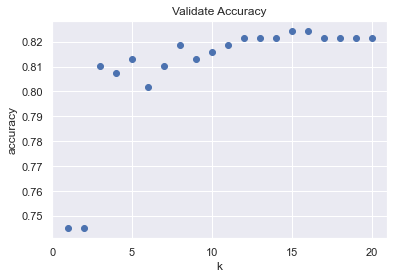

             train_accuracy  validate_accuracy  difference
n_neighbors                                               
1                       1.0           0.745042    0.254958
2                       1.0           0.745042    0.254958
3                       1.0           0.810198    0.189802
4                       1.0           0.807365    0.192635
5                       1.0           0.813031    0.186969
6                       1.0           0.801700    0.198300
7                       1.0           0.810198    0.189802
8                       1.0           0.818697    0.181303
9                       1.0           0.813031    0.186969
10                      1.0           0.815864    0.184136
11                      1.0           0.818697    0.181303
12                      1.0           0.821530    0.178470
13                      1.0           0.821530    0.178470
14                      1.0           0.821530    0.178470
15                      1.0           0.824363    0.1756

In [25]:
KNN_metrics(X2_train, y2_train, X2_validate, y2_validate, 'distance')

Terrible accuracy results here. Forget K-Nearest Neighbor for this data set. Let's try some logistic regression models.

In [26]:
logit1 = LogisticRegression(C = 1, random_state = 421, solver = 'liblinear')    # create model

logit1.fit(X_train, y_train)    # fit model

y_pred = logit1.predict(X_train)    # predict values

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       690
           1       0.73      0.23      0.34       133

    accuracy                           0.86       823
   macro avg       0.80      0.60      0.63       823
weighted avg       0.85      0.86      0.83       823



In [27]:
y_pred = logit1.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       296
           1       0.71      0.26      0.38        57

    accuracy                           0.86       353
   macro avg       0.79      0.62      0.65       353
weighted avg       0.85      0.86      0.84       353



Out of sample accuracy is 86%. This is the best accuracy I have achieved thus far.

In [28]:
logit2 = LogisticRegression(C = 1, random_state = 421, solver = 'liblinear')    # create model

logit2.fit(X2_train, y2_train)    # fit model

y_pred = logit2.predict(X2_train)    # predict values

print(classification_report(y2_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       690
           1       0.72      0.23      0.35       133

    accuracy                           0.86       823
   macro avg       0.80      0.61      0.64       823
weighted avg       0.85      0.86      0.83       823



Let's test the best model.

In [29]:
y_pred = logit2.predict(X2_test)
print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.46      0.13      0.20        47

    accuracy                           0.84       294
   macro avg       0.66      0.55      0.55       294
weighted avg       0.79      0.84      0.80       294



## Conclusion
### Summary
Drivers of IBM attrition: 
* job satisfaction
* relationship satisfaction
* total working years
* distance from home
* job level
* monthly income
* stock option level
* technical degree education
* sales rep job
* lab tech job
* being single
* overtime
* age

Couldn't beat the baseline depsite extensive exploration. Models need improvement.

### Recommendations
Don't use these models.

### Next Steps
I would like to investigate modeling with scaled data and smaller numbers of features. I would like to investigate how my models handle data with outliers removed.